Data Wrangling Notebook
Rail Accident Data

Python to format and clean the train accident data files for analysis

In [1]:
# Data management
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
from collections import Counter

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Input the data for 2001
# Look at the number of rows and columns

data_files = "/Users/RustyRosti/MSDS/Fall/DS_6001/inclass2/data"
os.chdir(data_files)

data_2001 = pd.read_csv("RailAccidents01.txt")

In [3]:
# Get variable (column) names

data_2001_dataframe = DataFrame(data_2001)
data_2001_dataframe.columns

Index(['AMTRAK', 'IYR', 'IMO', 'RAILROAD', 'INCDTNO', 'IYR2', 'IMO2', 'RR2',
       'INCDTNO2', 'IYR3', 
       ...
       'NARR15', 'RCL', 'Latitude', 'Longitud', 'SIGNAL', 'MOPERA', 'ADJUNCT1',
       'ADJUNCT2', 'ADJUNCT3', 'SUBDIV'],
      dtype='object', length=146)

In [4]:
# summarize  the variables "ACCDMG", "TRNSPD", "TONS", "CARSDMG", "TOTINJ", "TOTKLD"
data_2001_dataframe[["ACCDMG", "TRNSPD", "TONS", "CARSDMG", "TOTINJ", "TOTKLD"]].describe()

,ACCDMG,TRNSPD,TONS,CARSDMG,TOTINJ,TOTKLD
count,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,108422.482802,12.118755,3158.849862,0.236003,0.112227,0.014060
std,485949.866631,16.745899,4555.113012,1.012746,1.273383,0.168615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12000.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,22148.000000,5.000000,880.000000,0.000000,0.000000,0.000000
75%,54592.500000,10.000000,5015.000000,0.000000,0.000000,0.000000
max,16930000.000000,135.000000,59400.000000,24.000000,49.000000,7.000000


(array([  3.95000000e+03,   2.10000000e+01,   4.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([        0.,   1693000.,   3386000.,   5079000.,   6772000.,
          8465000.,  10158000.,  11851000.,  13544000.,  15237000.,
         16930000.]),
 <a list of 10 Patch objects>)

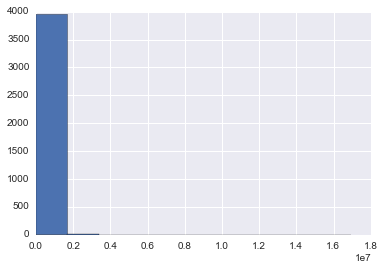

In [5]:
# Plot a hisogram of ACCDMG
plt.hist(data_2001_dataframe["ACCDMG"])

{'boxes': [<matplotlib.lines.Line2D at 0x10a920d68>],
 'caps': [<matplotlib.lines.Line2D at 0x10a77a160>,
 'fliers': [<matplotlib.lines.Line2D at 0x10a932860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10a932080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10a928080>,
  <matplotlib.lines.Line2D at 0x10a9288d0>]}

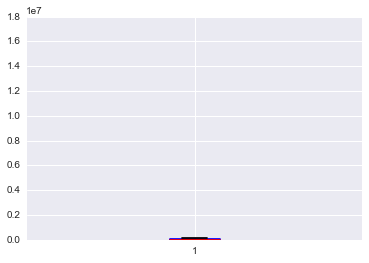

In [6]:
# box plot of ACCDMG
plt.boxplot(data_2001_dataframe["ACCDMG"])

In [7]:
# box plot of ACCDMG, TRKDMG, EQPDMG, CARSDMG

In [8]:
# box plot of TEMP

In [9]:
#Removing duplicates
d01clean = data_2001_dataframe.drop_duplicates(["YEAR","MONTH","DAY","TIMEHR","TIMEMIN"])
d01clean.shape

(3191, 146)

In [10]:
# Find the most expensive accident
# and get date and narrative for it 

maxx = max(d01clean.ACCDMG)
indxx = list(d01clean.ACCDMG).index(maxx)
d01clean = d01clean.reset_index()
(damage_cost,nine_11_index) = max((v,i) for i,v in enumerate(d01clean.ACCDMG))
print(damage_cost,nine_11_index)
print(nine_11_index)

d01_no_911 = d01clean.drop([nine_11_index])

print(d01clean.shape)
print(d01_no_911.shape)

print(max(d01clean.ACCDMG))
print(max(d01_no_911.ACCDMG))
d01_no_911 = d01_no_911.reset_index()

16930000.0 1222
1222
(3191, 147)
(3190, 147)
16930000.0
8063350.0


In [11]:
# Drop the 9/11/2001 accident

In [12]:
# Check removal of the 9/11/01 report

In [13]:
# Check for missing data
pd.isnull(d01_no_911).any()

level_0     False
index       False
AMTRAK       True
IYR         False
IMO         False
RAILROAD    False
INCDTNO     False
IYR2         True
IMO2         True
RR2          True
INCDTNO2     True
IYR3        False
IMO3        False
RR3         False
INCDTNO3    False
DUMMY1       True
GXID         True
YEAR        False
MONTH       False
DAY         False
TIMEHR      False
TIMEMIN     False
AMPM         True
TYPE        False
CARS        False
CARSDMG     False
CARSHZD     False
EVACUATE    False
DIVISION    False
STATION      True
            ...  
ALCOHOL      True
DRUG         True
DUMMY7       True
PASSTRN      True
SSB1         True
SSB2         True
NARR1       False
NARR2        True
NARR3        True
NARR4        True
NARR5        True
NARR6        True
NARR7        True
NARR8        True
NARR9        True
NARR10       True
NARR11       True
NARR12       True
NARR13       True
NARR14       True
NARR15       True
RCL          True
Latitude     True
Longitud     True
SIGNAL    

In [14]:
# Remove variables with missing data
# But keep TYPEQ and ....
typeq = d01_no_911.TYPEQ

numbers = []
for i in range(2,16):
    numbers.append("NARR" + str(i))
print(numbers)

narrs = d01_no_911[numbers]
print(narrs.shape)

['NARR2', 'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 'NARR8', 'NARR9', 'NARR10', 'NARR11', 'NARR12', 'NARR13', 'NARR14', 'NARR15']
(3190, 14)


In [15]:
# Look at the TYPEQ levels
typeq

0        8
1        8
2        2
3        2
4        2
5      NaN
6        7
7        1
8        7
9        1
10       7
11       7
12       2
13       2
14       2
15       2
16       9
17       7
18       5
19       1
20       1
21       1
22       1
23       7
24       6
25       1
26       1
27       1
28       7
29       1
        ..
3160     7
3161     1
3162     1
3163     1
3164     1
3165     7
3166     1
3167     1
3168     7
3169     1
3170     1
3171     1
3172     1
3173     7
3174     5
3175     1
3176     7
3177     1
3178     1
3179     1
3180     7
3181   NaN
3182     1
3183     1
3184     1
3185     1
3186     7
3187     7
3188     1
3189     1
Name: TYPEQ, dtype: float64

In [19]:
# Clean up TYPEQ 
# Use names for levels

d01_n9_clean = d01_no_911.dropna(axis=1)
#d01_n9_clean = d01_n9_clean.reset_index()
d01_n9_clean.describe()
d01_n9_clean.TYPEQ = typeq


map_typeq = {1:"Freight",2:"Passenger",3:"Commuter",4:"Work",\
             5:"Single",6:"CutofCars",7:"Yard",8:"Light",9:"Maint"}
d01_n9_clean.TYPEQ=d01_n9_clean.TYPEQ.map(map_typeq)
Counter(d01_n9_clean.TYPEQ)

Counter({nan: 167,
         'Maint': 40,
         'Single': 49,
         'Light': 113,
         'CutofCars': 91,
         'Passenger': 158,
         'Freight': 1558,
         'Yard': 966,
         'Work': 13,
         'Commuter': 35})

In [17]:
# Clean up the values in TYPE 
# use names for levels
causes = d01_n9_clean.CAUSE
mycause = Series([])

for i, c in enumerate(causes):
    if c.startswith("T"):
        mycause = mycause.append(Series(["T"]))
    if c.startswith("H"):
        mycause = mycause.append(Series(["H"]))
    if c.startswith("M"):
        mycause = mycause.append(Series(["M"]))
    if c.startswith("E"):
        mycause = mycause.append(Series(["E"]))
    else:
        mycause = mycause.append(Series(["S"]))
        
d01_n9_clean.CAUSE = causes
print(d01_n9_clean.CAUSE.iloc[0:10])

0    T108
1    E79L
2    E79L
3    H303
4    M404
5    E79L
6    H018
7    H018
8    M599
9    T399
Name: CAUSE, dtype: object


/Users/RustyRosti/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
# Clean up CAUSE
# Use the top of the hierarchy in CAUSE

In [17]:
# combining narratives into one list